In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
gdp_df = pd.read_csv("/Users/jonathanfarro/Documents/NSS/Python/projects/gdp-and-internet-usage-jonnyfarro/data/gdp_percapita.csv")
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [166]:
gdp_df.shape

(7662, 4)

In [168]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

How many rows and columns are in `gdp_df`? What are the data types of each column? 

7662,4 -objects 

In [172]:
gdp_df = gdp_df.drop(columns= ['Value Footnotes'])
gdp_df = gdp_df.rename(columns = {'Country or Area':'country','Year':'year','Value':'GDP_Per_Capita'})
gdp_df.head()

,country,year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [174]:
country_counts = gdp_df.country.value_counts().to_frame().reset_index()
country_counts


,country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [176]:
country_counts

,country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [178]:
len(country_counts)

242

In [180]:
len(country_counts.loc[country_counts['count'] == 33])


202

In [182]:
len(country_counts.loc[country_counts['count'] != 33])

40

In [184]:
gdp_2020 = gdp_df.loc[gdp_df.year == 2020]

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

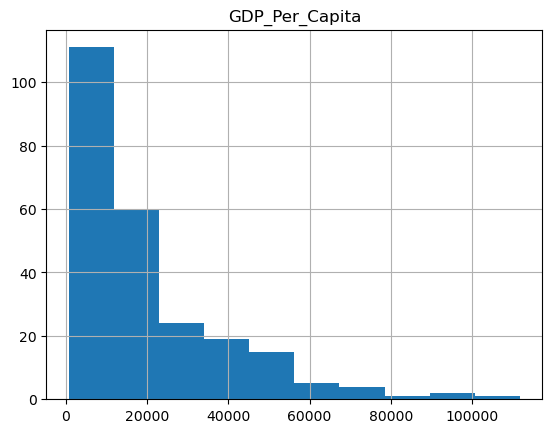

In [186]:
gdp_2020.hist('GDP_Per_Capita')

# bins go from min to max intervals, how many countries fit into each bin and gives a count.

In [189]:
count_year = gdp_df.year.value_counts().to_frame().reset_index()

<Axes: xlabel='year'>

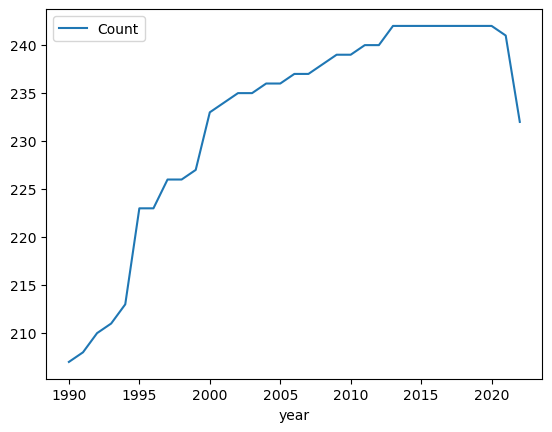

In [191]:
count_year.columns = ["year","Count"]
count_year.sort_values('year').plot(x = "year")

<Axes: >

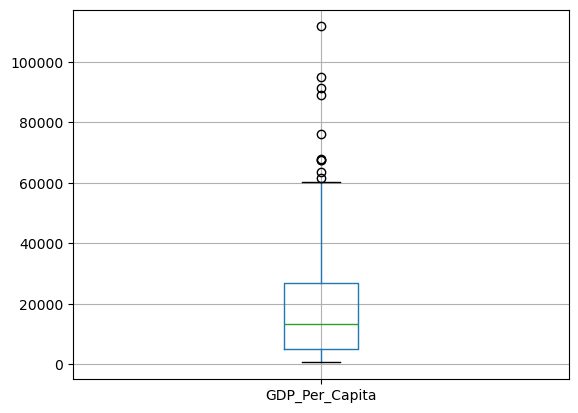

In [192]:
gdp_2020.boxplot("GDP_Per_Capita")

--half of the values fit in the box, median in green, quarter of the country at the very bottom.
final quarter 60000. less than ten outliers, countries making much more GDP than the rest. 

<Axes: xlabel='GDP_Per_Capita'>

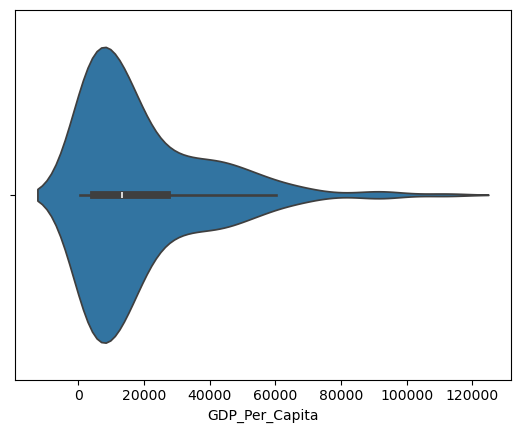

In [196]:
sns.violinplot(x = 'GDP_Per_Capita', data = gdp_2020) 

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

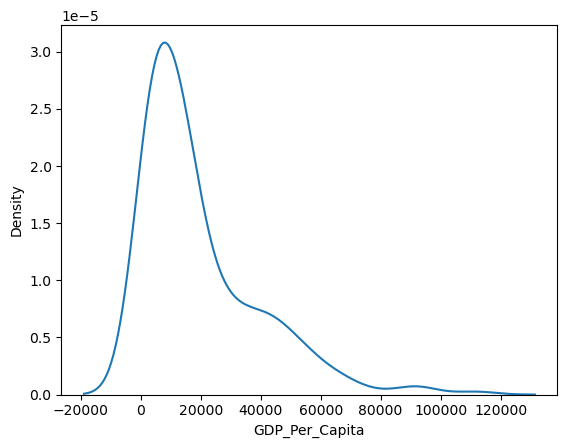

In [198]:
sns.kdeplot(x = "GDP_Per_Capita", data = gdp_2020)

In [200]:
gdp_2020.GDP_Per_Capita.mean()

19586.75444556196

In [219]:
gdp_decades = gdp_df.loc[gdp_df.year.isin([1990, 2000, 2010, 2020])]

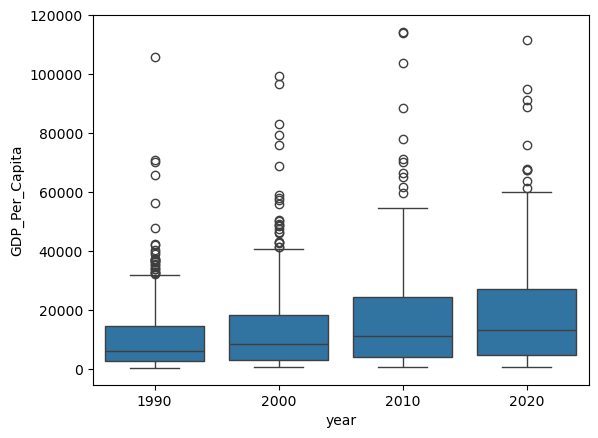

In [223]:
sns.boxplot(x= "year",y = "GDP_Per_Capita", data = gdp_decades);

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

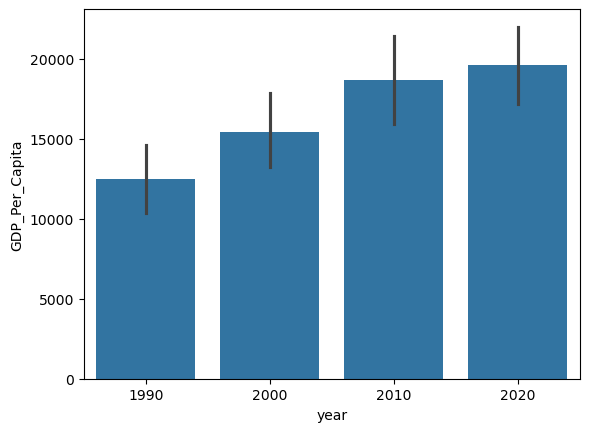

In [231]:
sns.barplot( x = 'year', y = "GDP_Per_Capita", data = gdp_decades)

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

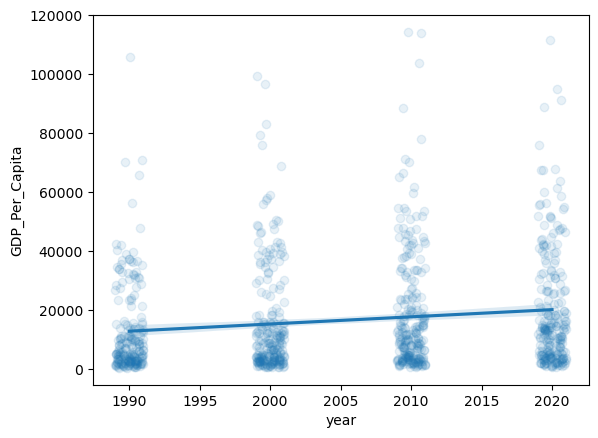

In [249]:
sns.regplot(x = gdp_decades.year, y = gdp_decades.GDP_Per_Capita, x_jitter = True, scatter_kws={'alpha':0.1})

In [267]:
gdp_df.loc[(gdp_df.year == gdp_df.loc[gdp_df.GDP_Per_Capita > 100000].year.min()) & (gdp_df.GDP_Per_Capita > 100000)]

,country,year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


In [269]:
rich =  gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]

In [271]:
rich.sort_values('year').head(1)


,country,year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


In [279]:
richest_2020 = gdp_2020.sort_values('GDP_Per_Capita',ascending = False).head(1).country.to_list()

In [281]:
richest_2020

['Luxembourg']

In [285]:
gdp_df.country.isin(richest_2020)

0       False
1       False
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661    False
Name: country, Length: 7662, dtype: bool

In [ ]:
gdp_df.country == richest_2020 [0]

<Axes: xlabel='year'>

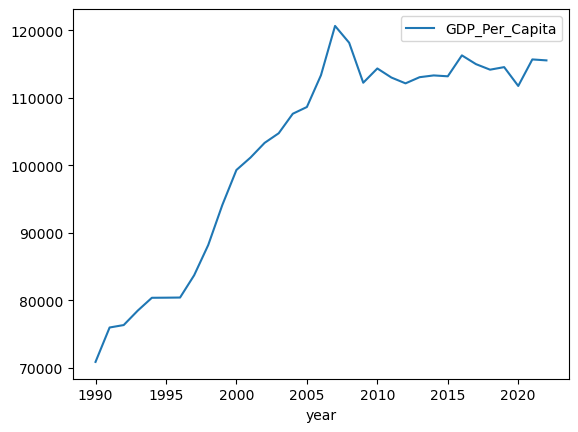

In [291]:
gdp_df.loc[gdp_df.country == richest_2020 [0]].plot(x = 'year')

In [297]:
poorest_2020 = gdp_2020.sort_values('GDP_Per_Capita').head(1).country

<Axes: xlabel='year'>

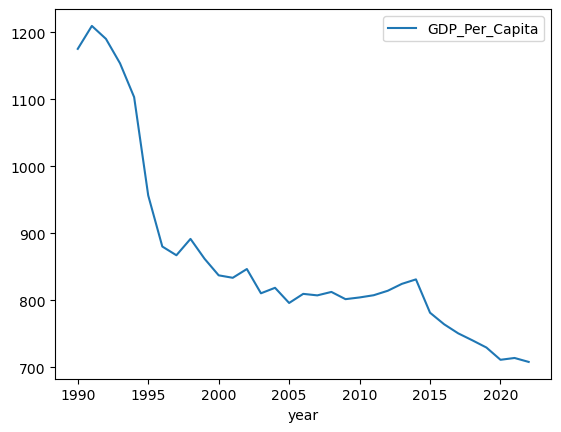

In [299]:
gdp_df.loc[gdp_df.country.isin(poorest_2020)].plot(x = 'year')

In [301]:
gdp_2020 

,country,year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [319]:
gdp_1990 = gdp_df.loc[gdp_df.year == 1990]

In [327]:
gdp_2020_1990 = pd.merge(gdp_1990,gdp_2020 , on = 'country', how = 'inner')

In [339]:
gdp_2020_1990.loc[gdp_2020_1990.GDP_Per_Capita_x > gdp_2020_1990.GDP_Per_Capita_y]

,country,year_x,GDP_Per_Capita_x,year_y,GDP_Per_Capita_y
15,Barbados,1990,14097.395550,2020,13805.777541
25,Brunei,1990,70358.724094,2020,61603.550804
28,Burundi,1990,1175.155086,2020,711.355263
34,Central African Republic,1990,1200.613390,2020,847.765012
41,Congo,1990,5007.319245,2020,3384.654335
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312
68,Gabon,1990,17559.006114,2020,13903.288955
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591
78,Haiti,1990,3612.815105,2020,2970.462845


In [345]:
internet = pd.read_csv('/Users/jonathanfarro/Documents/NSS/Python/projects/gdp-and-internet-usage-jonnyfarro/data/internet_use.csv')
internet 

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [347]:
internet = internet.drop(columns= ['Value Footnotes'])
        

In [349]:
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [365]:
internet = internet.rename(columns = { 'Country or Area': 'country', 'Year': 'year','Value':'Internet_Users_Pct'})
internet

,country,year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [383]:
internet_counts = internet.value_counts('year').to_frame().reset_index()
internet_counts

,year,count
0,1990,226
1,2007,217
2,2008,214
3,2011,214
4,2009,214
5,2002,214
6,2001,212
7,2005,212
8,2006,212
9,2004,210


In [387]:
internet_counts.columns = ['year','count']


<Axes: xlabel='year'>

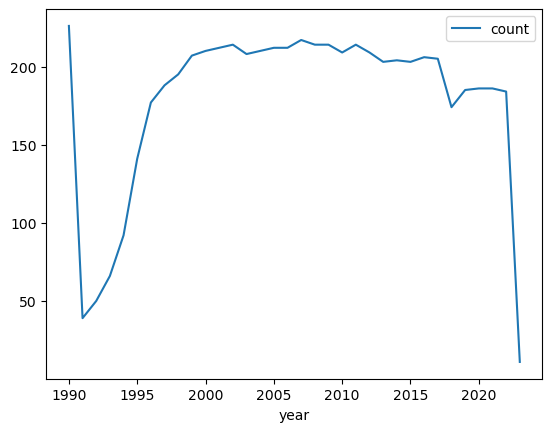

In [409]:
internet_counts.sort_values('year').plot(x = 'year', y = 'count')

In [86]:
 internet.loc[internet['Internet_Users_Pct'] > 0 ].sort_values('year').head(1)


,country,year,Internet_Users_Pct
1570,Denmark,1990,0.097277


In [399]:
internet_00_14 = internet.loc[internet.year.isin([2000,2014])]

<Axes: xlabel='year', ylabel='Internet_Users_Pct'>

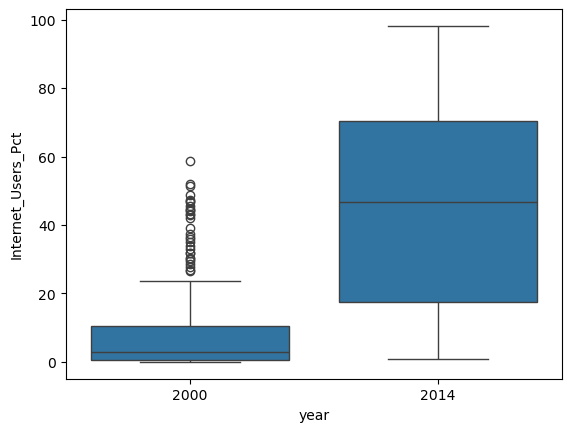

In [405]:
sns.boxplot(x= 'year', y = 'Internet_Users_Pct', data = internet_00_14)

In [417]:
len(internet.loc [(internet.year == 2014) & (internet.Internet_Users_Pct < 5)])

10

In [453]:
merged = pd.merge(gdp_df,internet, on  = ['country','year'],how = 'outer')

In [479]:
top_3 = merged.loc[merged.year == 2014].sort_values("Internet_Users_Pct", ascending = False).head(4).country

In [481]:
top_3

3820                        Iceland
2780    Falkland (Malvinas) Islands
794                         Bermuda
6243                         Norway
Name: country, dtype: object

In [483]:
top3 = merged.loc[merged.country.isin(top_3)]

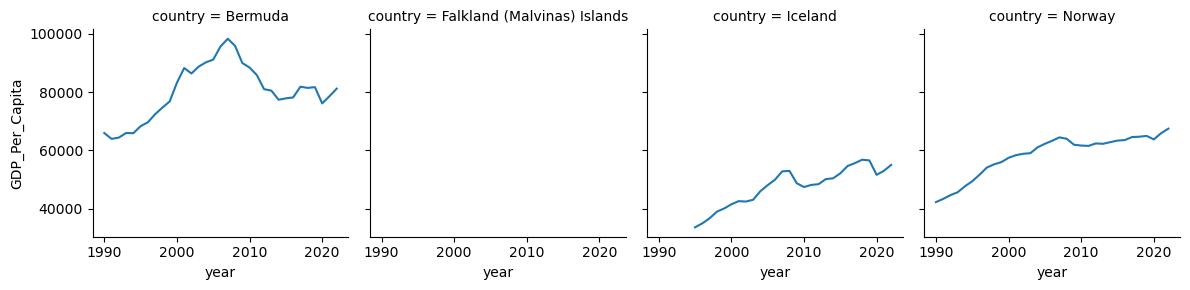

In [485]:
g = sns.FacetGrid(top3, col = 'country')
g.map(sns.lineplot, 'year', 'GDP_Per_Capita')

In [489]:
merg_2014 = merged.loc[merged.year == 2014]


<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

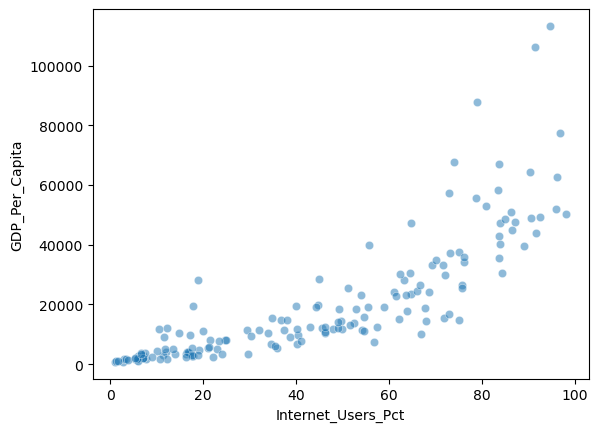

In [499]:
sns.scatterplot(x = "Internet_Users_Pct", y = "GDP_Per_Capita", data = merg_2014, alpha = 0.5)

In [503]:
merg_2014['GDP_group'] = pd.qcut(merg_2014.GDP_Per_Capita, q = 3, labels = ['low','med','hi'])

/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_82356/2661469064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merg_2014['GDP_group'] = pd.qcut(merg_2014.GDP_Per_Capita, q = 3, labels = ['low','med','hi'])


In [509]:
merg_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_82356/329839587.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merg_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
low    11.0000
med    45.8752
hi     75.9800
Name: Internet_Users_Pct, dtype: float64